# Jupyter Notebook
## Day 7
## Topics
- Random Walk
- Random walk with obstacle
- Pendulum 
<br></br>

# Random walk in 2D

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def random_walk_2d(num_steps):
    # Initialize arrays to store x and y coordinates
    x = np.zeros(num_steps+1)
    y = np.zeros(num_steps+1)

    for i in range(1, num_steps+1):
        # Generate random angles for x and y directions
        theta = 2 * np.pi * np.random.random()
        
        # Calculate the step size for x and y directions
        step_size = 1.0

        # Update the x and y coordinates
        x[i] = x[i-1] + step_size * np.cos(theta)
        y[i] = y[i-1] + step_size * np.sin(theta)

    return x, y

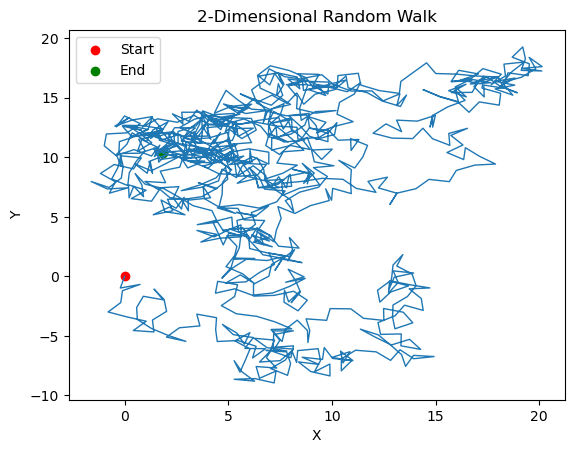

In [3]:
# Set the number of steps for the random walk
num_steps = 1000

# Perform the random walk
x, y = random_walk_2d(num_steps)

# Plot the random walk trajectory
plt.plot(x, y, lw=1)
plt.scatter(x[0], y[0], color='red', label='Start')
plt.scatter(x[-1], y[-1], color='green', label='End')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2-Dimensional Random Walk')
plt.legend()
plt.show()

### Mean Squared Displacement (MSD)
$$MSD = \frac{1}{N} \sum_{i=1}^{N} (\Delta x_i^2 + \Delta y_i^2)$$
Where:

N is the number of lag times or time intervals.
$\Delta x_i$ and $\Delta y_i$ are the displacements in the x and y directions, respectively, at each lag time.
You can use this formula in your Jupyter comments to describe how the Mean Squared Displacement is calculated.

In [4]:
# Set the number of steps for the random walk
num_steps = 1000
num_walks = 100

# Perform multiple random walks
msd_values = []

for _ in range(num_walks):
    x, y = random_walk_2d(num_steps)
    
    # Calculate the squared displacements for different lag times
    squared_displacements = []
    for lag_time in range(1, num_steps+1):
        squared_displacement = np.mean((x[lag_time:] - x[:-lag_time])**2 + (y[lag_time:] - y[:-lag_time])**2)
        squared_displacements.append(squared_displacement)
    
    msd_values.append(squared_displacements)

# Calculate the mean of MSD values
mean_msd = np.mean(msd_values, axis=0)


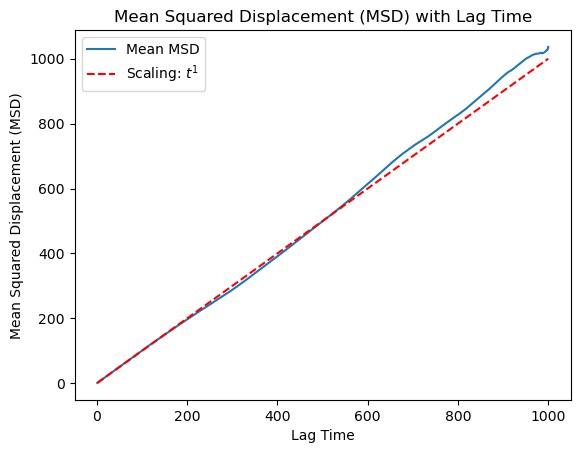

In [5]:
# Plot MSD with lag time
lag_times = range(1, num_steps+1)
plt.plot(lag_times, mean_msd, label='Mean MSD')

# Draw the scaling line with t^1
scaling_line = [t for t in lag_times]
plt.plot(lag_times, np.array(scaling_line), linestyle='--', color='red', label='Scaling: $t^1$')

plt.xlabel('Lag Time')
plt.ylabel('Mean Squared Displacement (MSD)')
plt.title('Mean Squared Displacement (MSD) with Lag Time')
plt.legend()
plt.show()


# Random walk with obstacle in 2D

In [6]:
def simulate_continuous_random_walk(grid_size, num_steps, obstacle_positions, particle_size, obstacle_size, step_size):
    # Initialize the particle's initial position
    particle_position = np.array([0, 0])

    # Initialize an array to track the particle's positions at each step
    particle_positions = np.zeros((num_steps + 1, 2))
    particle_positions[0] = particle_position

    # Perform the random walk
    for step in range(1, num_steps + 1):
        # Generate a random angle for the particle's movement
        angle = 2 * np.pi * np.random.random()

        # Calculate the proposed new position
        displacement = step_size * np.array([np.cos(angle), np.sin(angle)])
        new_position = particle_position + displacement

        # Check if the new position is valid (i.e., not inside an obstacle)
        valid_position = True
        for obstacle_pos in obstacle_positions:
            if np.linalg.norm(new_position - obstacle_pos) < particle_size + obstacle_size:
                valid_position = False
                break

        if valid_position:
            particle_position = new_position

        # Update the particle's position at the current step
        particle_positions[step] = particle_position

    return particle_positions

In [7]:
# Set the grid size, number of steps, and step size for the simulation
grid_size = 10
num_steps = 10000
step_size = 0.1

# Set the particle size
particle_size = 1.0
# Set the obstacle size
obstacle_size = 0.2 * particle_size

# Define the positions of obstacles
obstacle_positions = np.array([[2, 3], [-4, 4], [5, -2], [-3, -7]])#, [8, 5], [9, 1]])



# Simulate the continuous random walk of the particle
particle_positions = simulate_continuous_random_walk(grid_size, num_steps, obstacle_positions, particle_size, obstacle_size, step_size)

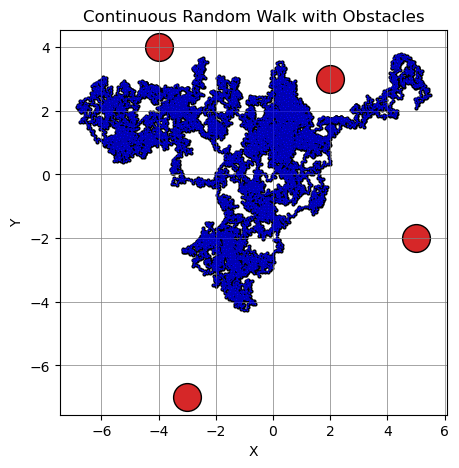

In [8]:
# Plot the grid, obstacle positions, and particle trajectory
plt.figure(figsize=(5, 5))
plt.grid(True, color='gray', linewidth=0.5)
plt.scatter(particle_positions[:, 0], particle_positions[:, 1], c='blue', s=obstacle_size * 20,edgecolors='k')
plt.scatter(obstacle_positions[:, 0], obstacle_positions[:, 1], c='tab:red', s=obstacle_size * 2000, edgecolors='k', alpha=1.0)
plt.plot(particle_positions[:, 0], particle_positions[:, 1], c='blue', linewidth=1, alpha=0.7)
plt.title('Continuous Random Walk with Obstacles')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### MSD

In [9]:
# Set the number of ensembles
num_ensembles = 20

# Initialize an array to store the squared displacements for each ensemble
squared_displacements_ensembles = []

# Simulate multiple ensembles of the continuous random walk of the particle
for _ in range(num_ensembles):
    particle_positions = simulate_continuous_random_walk(grid_size, num_steps, obstacle_positions, particle_size, obstacle_size, step_size)
    
    # Calculate the squared displacements for each ensemble
    squared_displacements = []
    for lag_time in range(1, num_steps + 1):
        squared_displacement = np.mean(np.sum((particle_positions[lag_time:] - particle_positions[:-lag_time])**2, axis=1))
        squared_displacements.append(squared_displacement)
    
    squared_displacements_ensembles.append(squared_displacements)

# Calculate the average squared displacements across ensembles
average_squared_displacements = np.mean(squared_displacements_ensembles, axis=0)


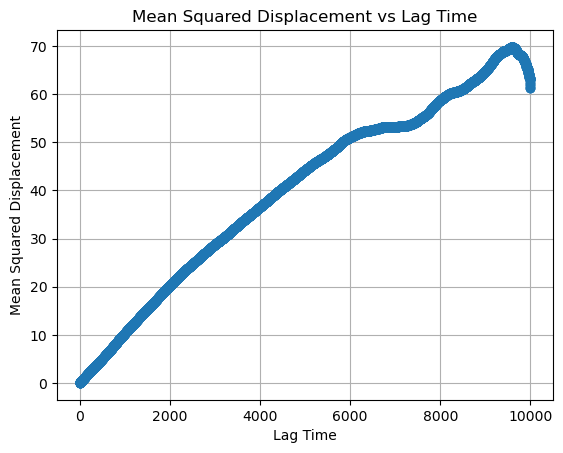

In [39]:
# Plot the MSD with lag time
lag_times = np.arange(1, num_steps + 1)
plt.plot(lag_times, average_squared_displacements, marker='o')
plt.xlabel('Lag Time')
plt.ylabel('Mean Squared Displacement')
plt.title('Mean Squared Displacement vs Lag Time')
plt.grid(True)
plt.show()

# Pendulum

The formula for the period of a simple pendulum is given by:

$$ T = 2\pi \sqrt{\frac{L}{g}} $$

where:
- \( T \) is the period of the pendulum,
- \( $\pi$ \) is the mathematical constant pi (approximately 3.14159),
- \( L \) is the length of the pendulum,
- and \( g \) is the acceleration due to gravity.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Libraries
- numpy : NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more. https://numpy.org
- matplotlib : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. https://matplotlib.org
- seaborn : Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions. https://seaborn.pydata.org/examples/anscombes_quartet.html

In [40]:
def pendulum_time_period(length, mass, gravity):
    """Calculate the time period of a pendulum."""
    if length <= 0 or mass <= 0 or gravity <= 0:
        return None  # Invalid input\''

    period = 2 * np.pi * np.sqrt(length / gravity)
    return period

In [41]:
# Inputs
mass = 1 # mass (in Kg)
lengths = np.linspace(1.0, 2.0, 10)  # Array of pendulum lengths (in meters)
gravities = np.linspace(1., 10, 10)  # Array of gravitational accelerations (in m/s^2)

# Create an empty 2D array to store time periods
time_periods = np.empty((len(lengths), len(gravities)))

# Calculate time periods for different combinations
for i, length in enumerate(lengths):
    for j, gravity in enumerate(gravities):
        time_period = pendulum_time_period(length, mass, gravity)
        if time_period is not None:
            time_periods[i, j] = time_period
        else:
            time_periods[i, j] = np.nan

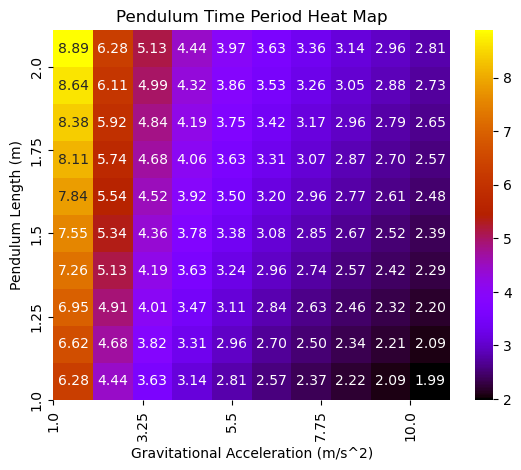

In [42]:
# Create a heat map using Seaborn
sns.heatmap(time_periods, cmap='gnuplot', annot=True, fmt=".2f")

# Set x-axis and y-axis labels
plt.xlabel('Gravitational Acceleration (m/s^2)')
plt.ylabel('Pendulum Length (m)')

# Set x-axis and y-axis ticks and labels
xticklabels = np.linspace(min(gravities), max(gravities), 5)
yticklabels = np.linspace(min(lengths), max(lengths), 5)
plt.xticks(np.linspace(0, len(gravities) - 1, 5), xticklabels, rotation='vertical')
plt.yticks(np.linspace(0, len(lengths) - 1, 5), yticklabels)

ax=plt.gca()
ax.invert_yaxis()
# Set plot title
plt.title('Pendulum Time Period Heat Map')

# Display the plot
plt.show()

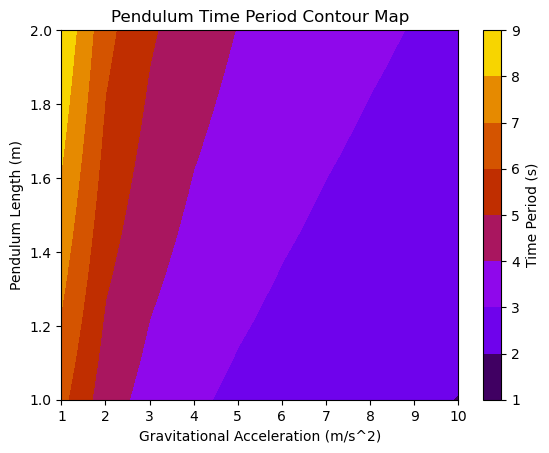

In [43]:
# Create a meshgrid for the lengths and gravities
X, Y = np.meshgrid(gravities, lengths)

# Calculate time periods for different combinations
Z = np.zeros_like(X)
for i in range(len(lengths)):
    for j in range(len(gravities)):
        Z[i, j] = pendulum_time_period(lengths[i],mass, gravities[j])

# Create a contour map
plt.contourf(X, Y, Z, cmap='gnuplot')
plt.colorbar(label='Time Period (s)')

# Set x-axis and y-axis labels
plt.xlabel('Gravitational Acceleration (m/s^2)')
plt.ylabel('Pendulum Length (m)')

# Set plot title
plt.title('Pendulum Time Period Contour Map')

# Display the plot
plt.show()
